Week of Jul 3 - 8:

1. Find the central galaxies and their satellites: by compare virial radius between nearby galaxies 

2. Calculate total halo mass;

3. Calculate total GCs;

4. Compare to our model;

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

path ='/home/ngoc/Downloads/GCs/'
path1 ='/home/ngoc/Downloads/GCs/code/'

In [2]:
#load the coordinates, halo mass and #GC after match
M_h  = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(0))
N_GC = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(1))
ra   = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(2))
dec  = np.loadtxt(path+"code/data_Atlas_Harris13_by_rpes.txt",usecols=(3))

In [3]:
from halotools.empirical_models import halo_mass_to_halo_radius

In [4]:
from astropy.cosmology import Planck18 as cosmo

halotools.empirical_models.halo_mass_to_halo_radius(mass, cosmology, redshift, mdef)

Spherical overdensity radius as a function of the input mass. Note that this function is independent of the form of the density profile.

Parameters:
- mass: array_like, total halo mass in M⊙/h; can be a number or a numpy array.

- cosmology : object, instance of an Astropy cosmology object.

- redshift: array_like, can either be a scalar, or a numpy array of the same dimension as the input mass.

- mdef: str, string specifying the halo mass definition, e.g., ‘vir’ or ‘200m’.

Return:

- radius: array_like, halo radius in physical Mpc/h; has the same dimensions as input mass.

In [5]:
r_vir = halo_mass_to_halo_radius(M_h, cosmo, 0, 'vir')

Find the galaxies which are inside the same halo:

- compare their location;
- if they stay close to one another, then compare their virial radius;



In [6]:
r_vir2 = r_vir

In [7]:
r_new     = np.zeros(len(r_vir2))
ra_new    = np.zeros(len(r_vir2))
dec_new   = np.zeros(len(r_vir2))
M_h_new   = np.zeros(len(r_vir2))
N_GC_new  = np.zeros(len(r_vir2))
ii     = 0

while (ii < len(r_vir2)):
    idx         = np.argmax(r_vir2)
    r_new[ii]   = r_vir2[idx]
    ra_new[ii]  = ra[idx]
    dec_new[ii] = dec[idx]
    M_h_new[ii] = M_h[idx]
    N_GC_new[ii]= N_GC[idx]
    r_vir2[idx] = 0
    ii += 1
print(r_new)
print(r_vir2)

[3.01123605 1.08169211 1.05701604 1.02397576 0.79526008 0.74167409
 0.69182955 0.68782283 0.64969336 0.61947412 0.59787615 0.59760387
 0.58965357 0.58118481 0.55189032 0.54110282 0.54024055 0.53095847
 0.51907825 0.51731354 0.49681274 0.49135539 0.48645362 0.48430363
 0.48430363 0.47665371 0.44162193 0.43631787 0.43474192 0.43336228
 0.41484121 0.39212886 0.36978803 0.35532842 0.35112316 0.33289505
 0.3182894  0.30415799 0.27546914 0.26885078 0.25656156 0.25102204
 0.24657587 0.23910598 0.23587827 0.23398932 0.23355678 0.22890738
 0.22833696 0.22809636 0.22589819 0.225236   0.2221307  0.22110236
 0.2206363  0.21238546 0.20894342 0.20637972 0.2017369  0.19619221
 0.19304397 0.19151286 0.18657259 0.18636112 0.18400051 0.18396152
 0.18365427 0.18244498 0.17669477 0.17486539 0.17416268 0.17415039
 0.17217338 0.16959023 0.16489307 0.16481229 0.16100567 0.15984285
 0.15828681 0.15648326 0.15609224 0.15531406 0.15507662 0.15467101
 0.15356583 0.15255943 0.15231999 0.15223604 0.14971619 0.1495

In [8]:
#find central-satellite galaxies inside the same halos, True marks central galaxies, False marks satellite galaxies of the central ones above in the array
r_boo = np.full(len(r_new),True)

for j in range (0, 1):#len(r_new)):
    if r_boo[j] == True:
        cen = j
    for i in range(0,len(r_new)):   
        if i!= cen and r_boo[i] == True:
            distance_to_cen = np.sqrt((ra_new[i]-ra_new[cen])**2+(dec_new[i]-dec_new[cen])**2)
            if distance_to_cen < r_new[cen]:
                r_boo[i] = False
            else:
                r_boo[i] = True
            

In [9]:
print(r_boo)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True False  True  True  True
  True False False  True  True  True False False  True  True  True  True
  True  True  True False  True False  True  True False  True  True  True
  True False False  True  True  True  True  True  True False  True  True
  True  True False  True  True False False  True False False False False
  True  True  True False  True False False  True False False False  True
 False False False  True  True False False False  True False False  True
  True False False False  True False False  True  T

In [10]:
#find central-satellite galaxies inside the same halos, True marks central galaxies, False marks satellite galaxies of the central ones above in the array
r_boo = np.full(len(r_new),True)
n_cen = 0
for j in range (0, len(r_new)):
    if r_boo[j] == True:
        cen = j
        n_cen += 1
    for i in range(0,len(r_new)):   
        if i!= cen and r_boo[i] == True:
            distance_to_cen = np.sqrt((ra_new[i]-ra_new[cen])**2+(dec_new[i]-dec_new[cen])**2)
            if distance_to_cen < r_new[cen]:
                r_boo[i] = False   #this galaxy is a sat of the cen
                M_h_new[cen] += M_h_new[i]
                N_GC_new[cen]+= N_GC_new[i]
            else:
                r_boo[i] = True    #this galaxy is not a sat of the cen (perhaps it is another cen or a sat of the other cen)
            

In [11]:
print(r_boo)
print(n_cen)

[ True  True  True  True  True  True False  True  True  True  True  True
 False  True False  True False  True  True False False  True False False
 False  True False False  True  True False  True  True  True  True  True
  True  True  True False False  True  True False  True False  True  True
  True  True  True False False  True  True  True False False False False
 False  True False  True  True  True False  True  True  True False False
 False  True  True  True False  True False False False  True  True False
  True False False False False  True False False  True False  True  True
 False False False False False False  True  True False False False  True
 False False False  True  True False False  True  True False False  True
 False  True False  True  True False False  True False False False False
  True False  True False  True False False False False False False  True
 False False False  True  True False False False False False False  True
  True False False False  True False False  True Fa

In [12]:
r_boo2 = r_boo
i_test = len(M_h_new)
for i in range(0,len(r_boo)):
    if r_boo[i] == False:
        M_h_new[i]  = 0
        N_GC_new[i]  = 0
        i_test -= 1

In [13]:
print(M_h_new, N_GC_new)
print(i_test)

[3.28502043e+15 1.90195792e+14 1.40670457e+14 1.42493402e+14
 1.46425253e+14 4.85956608e+13 0.00000000e+00 3.87603702e+13
 3.26650586e+13 2.83157242e+13 2.54560992e+13 2.57799729e+13
 0.00000000e+00 2.33830372e+13 0.00000000e+00 3.53610786e+13
 0.00000000e+00 1.78295267e+13 1.66592963e+13 0.00000000e+00
 0.00000000e+00 5.10848387e+13 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.28993284e+13 0.00000000e+00 0.00000000e+00
 9.78707064e+12 9.69418876e+12 0.00000000e+00 7.18198631e+12
 7.07008372e+12 7.68630706e+12 5.15628117e+12 4.39420370e+12
 3.86463452e+12 3.35162821e+12 4.34261510e+12 0.00000000e+00
 0.00000000e+00 3.24509772e+12 1.78570560e+12 0.00000000e+00
 1.56322679e+12 0.00000000e+00 1.51752406e+12 1.42868843e+12
 1.41803459e+12 1.41355668e+12 1.37308175e+12 0.00000000e+00
 0.00000000e+00 1.99271665e+12 1.69076801e+12 1.14112319e+12
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.36665774e+11 0.00000000e+00 7.70946302e+11
 8.12003359e+11 7.415477

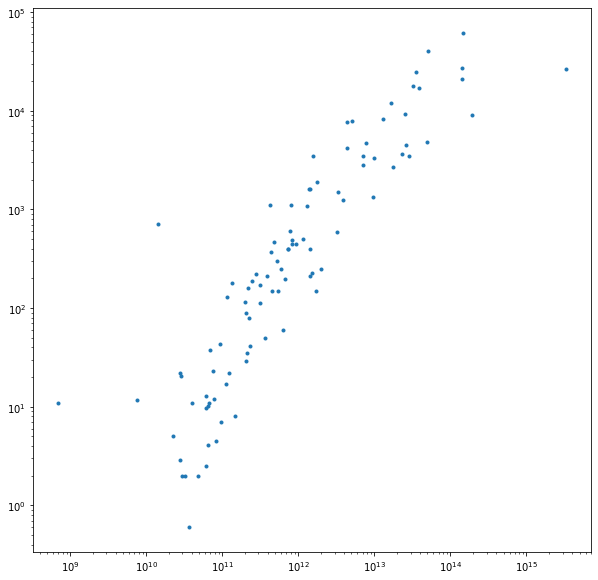

In [14]:
plt.figure(figsize=(10,10))
plt.loglog(M_h_new,N_GC_new,'.')

In [15]:
#load theory results
M_halo_theo                 = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt(path1+"theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt(path1+"theory_ourmodel.txt"     ,usecols=(6))

In [27]:
#load data from Forbes et al.18
M_halo_F = np.loadtxt(path1+'Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt(path1+'Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [17]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt(path1+'EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt(path1+'EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt(path1+'EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt(path1+'EMOSAICS_data.txt', usecols =(3))

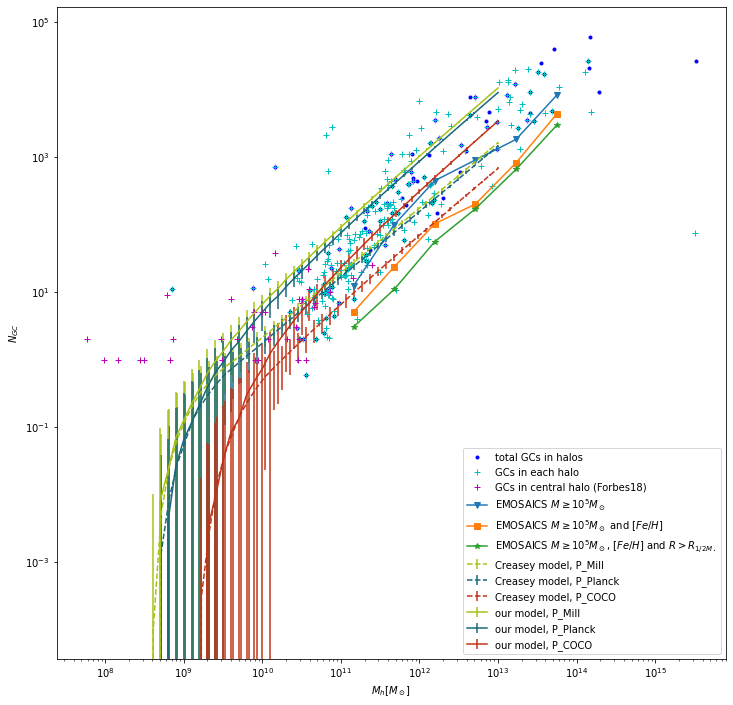

In [36]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale("log")
plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')
plt.plot(M_h_new,N_GC_new, 'b.', label = 'total GCs in halos')
plt.plot(M_h,    N_GC,     'c+', label = 'GCs in each halo')
plt.plot(M_halo_F,  N_GC_F,'m+', label = 'GCs in central halo (Forbes18)')
plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')
plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()#loc=(1.1,0))
#plt.show()
plt.savefig('tot_GC_vs_EMOSAICS.png')

In [258]:
a = np.inf
b = np.inf
print(a == b, a is b)

True True


In [259]:
a = None
b = None
print(a == b, a is b)

True True


In [257]:
a = np.nan
b = np.nan
print(a == b, a is b)

False True


In [256]:
a = True
b = True
print(a == b, a is b)

True True


In [260]:
a =[1,2,3]
id(a)

139902892452288

In [261]:
b =[1,2,3]
id(b)

139902891539520

In [262]:
a =None
id(a)

94841007021312

In [263]:
b=None
id(b)

94841007021312

In [264]:
a=np.inf
id(a)

139903934461296

In [265]:
b=np.inf
id(b)

139903934461296